<a href="https://colab.research.google.com/github/PercyNova/HR-Employee-Attribution/blob/main/Attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/HR-Employee-Attrition.csv')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
#Show data Types
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [40]:
 # Convert Attrition to 0 & 1
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [41]:
#Show the statistcs of the dataset
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Descriptive Questions
1. What is the overall attrition rate? (This will give HR a baseline)

In [42]:
# Calculate attrition rate
attrition_rate = df["Attrition"].mean() * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")


Overall Attrition Rate: 16.12%


We see that the attrition is above 15% which means that the company has a problem with retaining employees

2. Which departments have the highest attrition? (This will help put retention effort focus of those departments)

In [43]:
# Attrition by department
dept_attrition = df.groupby("Department")["Attrition"].mean() * 100
print(dept_attrition.sort_values(ascending=False))

Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64


We now can narrow the reasons and as employees in that department what the problem is.

3. Do age, salary or years at the company impact attrition?

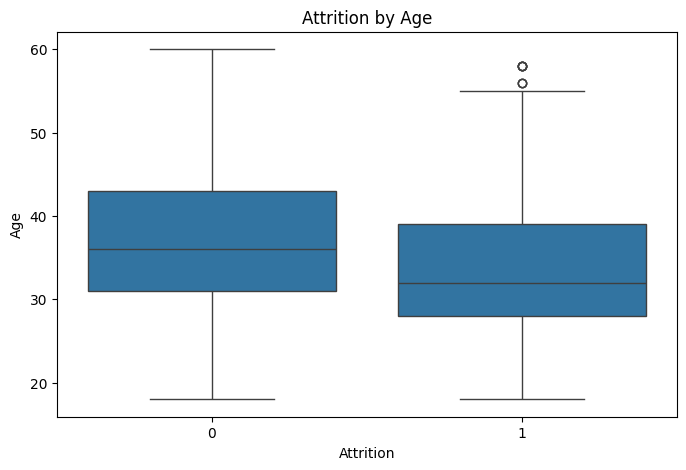

In [44]:
# Boxplot for Age vs. Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Attrition"], y=df["Age"])
plt.title("Attrition by Age")
plt.show()


Younger age increases attrition risk.  This is detrimental as it leads to loss of future talent and increased hiring/training costs.

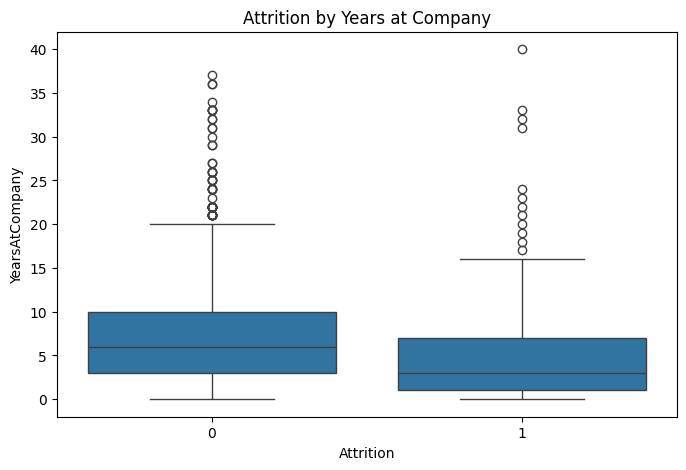

In [45]:

# Years at Company vs. Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Attrition"], y=df["YearsAtCompany"])
plt.title("Attrition by Years at Company")
plt.show()


Early-tenure attrition is a critical issue.  Shorter tenures significantly increase attrition risk, threatening long-term sustainability and knowledge base. Action is needed to improve early tenure retention

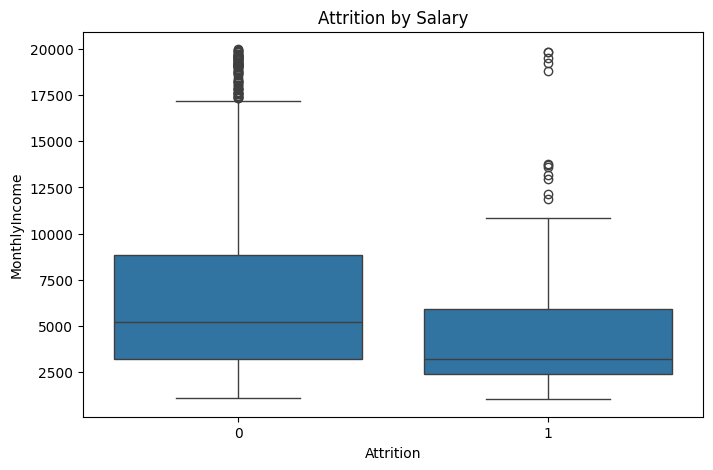

In [46]:
# Salary vs. Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Attrition"], y=df["MonthlyIncome"])
plt.title("Attrition by Salary")
plt.show()

People who leave have lower monthly incomes which could indicate that salary influences people to leave because maybe they are not happy with the salary.

#Diagnostic Analytics
1. Correlation Analysis

In [47]:
# Select relevant numerical columns
num_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'Attrition']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()
print(corr_matrix)


                      Age  MonthlyIncome  YearsAtCompany  JobSatisfaction  \
Age              1.000000       0.497855        0.311309        -0.004892   
MonthlyIncome    0.497855       1.000000        0.514285        -0.007157   
YearsAtCompany   0.311309       0.514285        1.000000        -0.003803   
JobSatisfaction -0.004892      -0.007157       -0.003803         1.000000   
Attrition       -0.159205      -0.159840       -0.134392        -0.103481   

                 Attrition  
Age              -0.159205  
MonthlyIncome    -0.159840  
YearsAtCompany   -0.134392  
JobSatisfaction  -0.103481  
Attrition         1.000000  


As seen that attrition has a negative corrolation with Age, Monthly Income which are proven by the graphs above, and Job Satisfaction

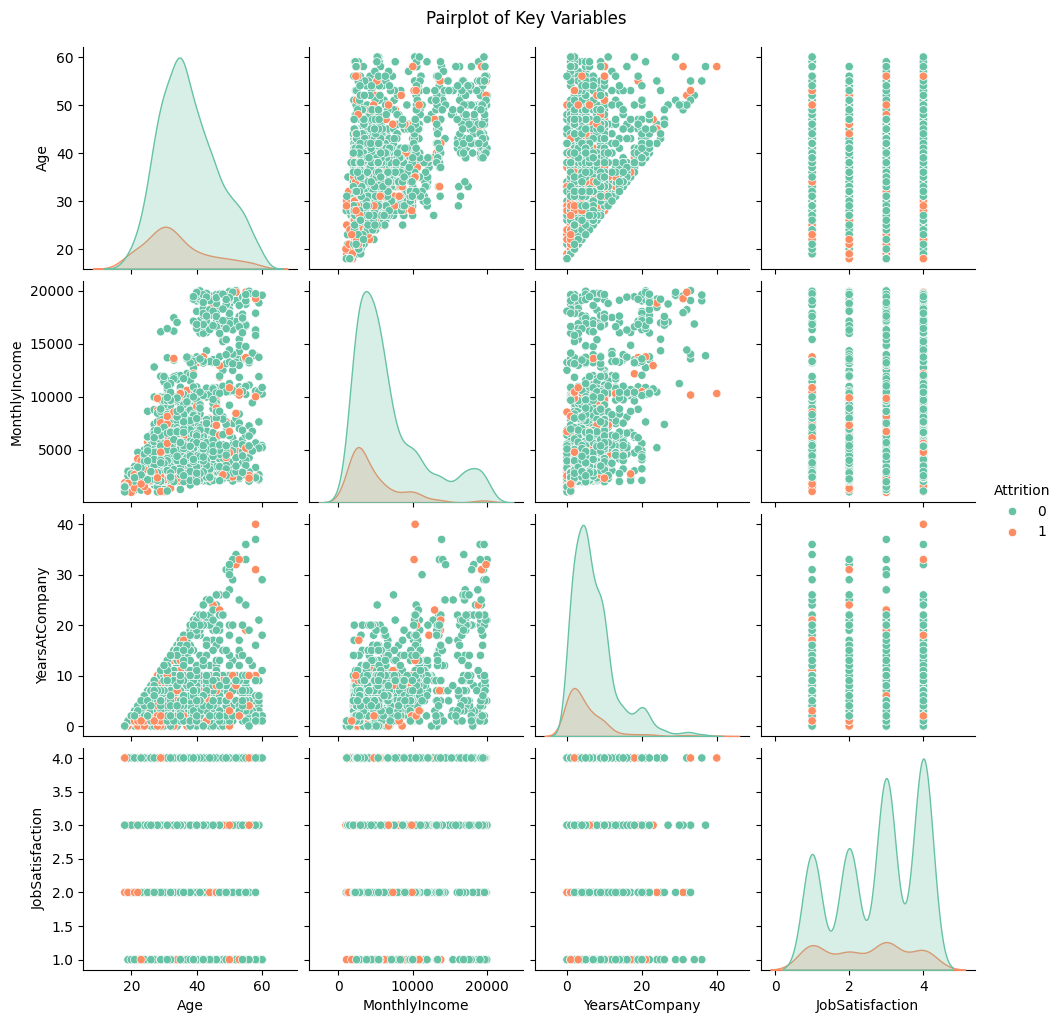

In [48]:
# Pairplot to see interactions (with attrition as the hue)
sns.pairplot(df[num_cols], hue='Attrition', palette="Set2")
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()


This pairplot visually explores relationships between key employee variables and attrition.  Notably, employees who experienced attrition (orange/red points) tend to cluster towards younger ages, lower monthly incomes, and shorter tenures at the company, as seen in the scatter plots for these variable pairs.  While JobSatisfaction shows less distinct separation between attrition groups in these plots, the overall pattern suggests that attrition is more likely among a subgroup of younger, lower-paid employees with shorter company tenure.  This visualization reinforces the idea that these factors are related to employee turnover.

In [49]:
import statsmodels.api as sm

# Prepare the feature matrix and target variable
features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']
X = df[features]
X = sm.add_constant(X)  # Adds an intercept term
y = df['Attrition']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.414521
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1465
Method:                           MLE   Df Model:                            4
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                 0.06152
Time:                        01:05:07   Log-Likelihood:                -609.35
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.837e-16
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7736      0.353      2.194      0.028       0.082       1.465
Age           

Combining the pairplot visualization and logit regression results, we find consistent evidence that younger employees with lower monthly incomes and shorter tenures at the company are more prone to attrition.  Both analyses indicate a negative relationship between Age, Monthly Income, Years at Company, and the likelihood of leaving.  While Job Satisfaction also shows a statistically significant negative association with attrition, the visual and regression models suggest that age, income, and tenure are more distinct factors in predicting employee turnover, particularly within a subgroup of younger, less tenured, and lower-paid employees.  It's important to note that these factors, while statistically significant, explain only a portion of the attrition variance, suggesting other unexamined elements also play a role.

---

##Additional Diagnostic Analysis

---

1. Attrition Against Overtime

Attrition          0          1
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


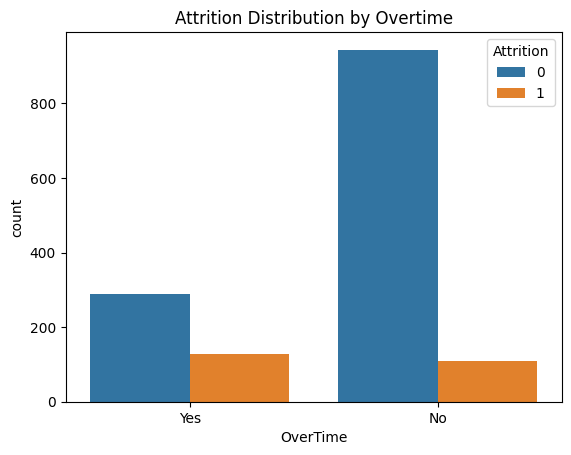

In [50]:
# Create a crosstab: OverTime vs. Attrition (assuming Attrition is binary: 1=Yes, 0=No)
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
print(overtime_attrition)

# Visualize with a count plot
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition Distribution by Overtime")
plt.show()

As seen Overtime does not contribute to Attrition

---

2. Distance From Home Against Attrition and Overtime

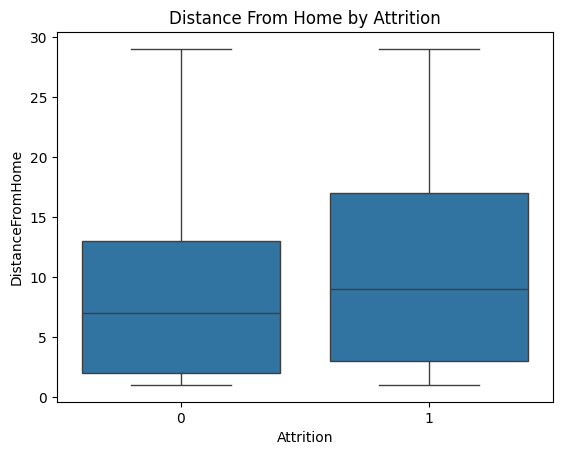

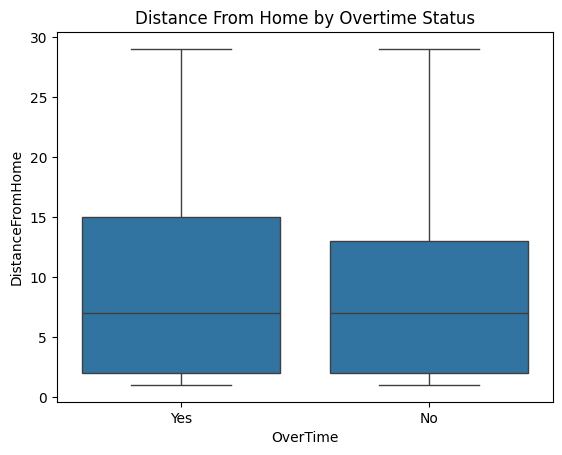

In [51]:
# Boxplot: DistanceFromHome vs. Attrition
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title("Distance From Home by Attrition")
plt.show()

# Boxplot: DistanceFromHome vs. OverTime
sns.boxplot(x='OverTime', y='DistanceFromHome', data=df)
plt.title("Distance From Home by Overtime Status")
plt.show()


Based on this box plot, we can observe that employees who left the company tend to have, on average, a slightly greater distance from home compared to employees who stayed. While the difference in medians is not dramatically large, the distribution for the 'Attrition = 1' group is shifted towards slightly higher distances, and shows a bit more spread, particularly in the upper range of distances. This suggests that distance from home might be a minor contributing factor to attrition, with employees living further away being slightly more likely to leave.

---

3. Work-Life Balance

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


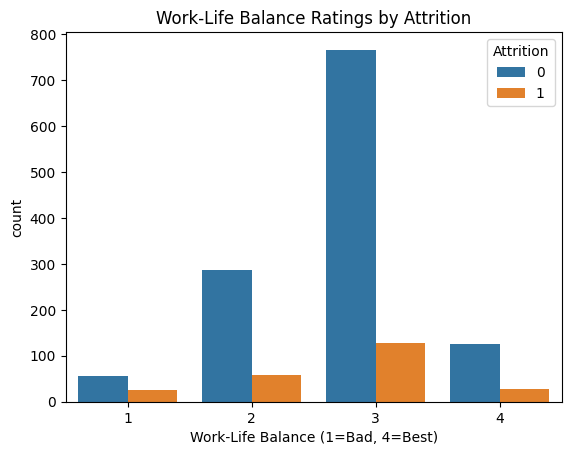

In [52]:
# Check the distribution of WorkLifeBalance ratings
print(df['WorkLifeBalance'].value_counts())

# Visualize WorkLifeBalance vs. Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("Work-Life Balance Ratings by Attrition")
plt.xlabel("Work-Life Balance (1=Bad, 4=Best)")
plt.show()


The scatter plot visualization reveals the relationship between employees' total company tenure and their time in current roles. The distribution shows a dense concentration of attrition cases in the early years of both company tenure and role tenure, particularly within the first 10 years of employment. Employees with longer company tenures demonstrate notably lower attrition rates. This pattern suggests that retention risk is highest during the early-to-mid career phase at the company, while long-term employees show stronger organizational commitment.

---

 4. Years in Current Role vs. Years at Company

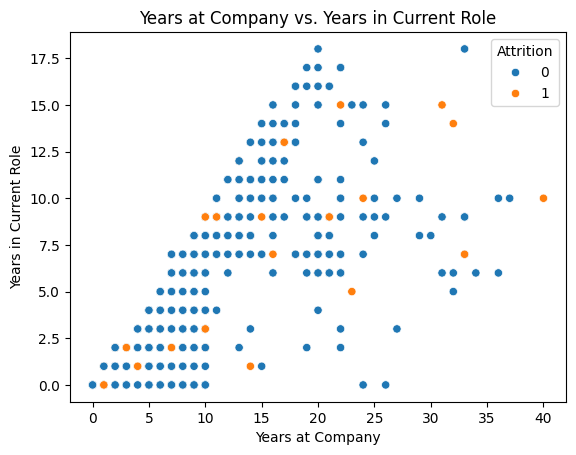

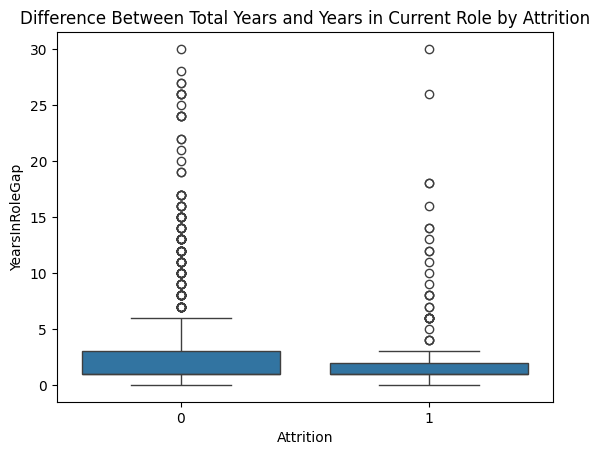

In [53]:
# Scatter plot: YearsAtCompany vs. YearsInCurrentRole
sns.scatterplot(x='YearsAtCompany', y='YearsInCurrentRole', hue='Attrition', data=df)
plt.title("Years at Company vs. Years in Current Role")
plt.xlabel("Years at Company")
plt.ylabel("Years in Current Role")
plt.show()

# You can also calculate the difference as a new column:
df['YearsInRoleGap'] = df['YearsAtCompany'] - df['YearsInCurrentRole']
sns.boxplot(x='Attrition', y='YearsInRoleGap', data=df)
plt.title("Difference Between Total Years and Years in Current Role by Attrition")
plt.show()


The bar chart presents employee work-life balance ratings on a scale of 1 to 4, separated by attrition status. A clear majority of retained employees rate their work-life balance as 3, indicating general satisfaction. The proportion of employees leaving decreases significantly as work-life balance ratings improve, with notably lower attrition rates among those reporting high satisfaction (ratings of 3 and 4). This strong correlation suggests that work-life balance is a crucial factor in employee retention, with poor work-life balance potentially serving as a key driver of attrition.

---

The box plot illustrates the difference between total years at the company and years in current role, segmented by attrition status. Both retained employees and those who left show similar median gaps between their total tenure and role tenure. The presence of numerous outliers in both groups indicates instances where employees have spent significantly longer at the company compared to their current role. The similarity in distributions between both groups suggests that the gap between company tenure and role tenure is not a strong predictor of attrition risk.

---

5. Job Involvement


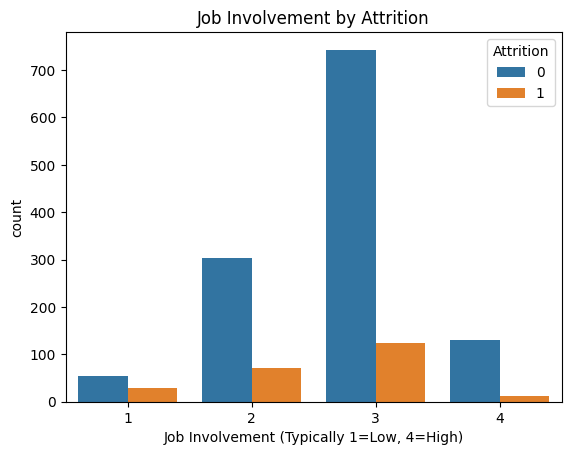

In [54]:
# Visualize Job Involvement by Attrition
sns.countplot(x='JobInvolvement', hue='Attrition', data=df)
plt.title("Job Involvement by Attrition")
plt.xlabel("Job Involvement (Typically 1=Low, 4=High)")
plt.show()


The bar chart displays job involvement levels rated from 1 (low) to 4 (high), categorized by attrition status. The data shows a strong positive correlation between job involvement and retention, with the majority of employees reporting level 3 involvement. The proportion of employees leaving (orange bars) decreases substantially as job involvement increases, with particularly low attrition among those reporting high involvement (level 4). This suggests that higher job involvement is associated with better retention rates, potentially indicating that engaged employees are more likely to stay with the company.